In [1]:
# load bootstrapped and raw GDP/impact time series for a single country and compare...

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import xarray as xr

import tc_cost.util.constants as u_const
import tc_cost.util.data as u_data

In [2]:
minwind = 34
indicator = "peop"

sel_country_name = "USA"
sel_country_iso = "USA"

ds_growth = xr.open_dataset(u_const.BOOTSTRAP_DIR / "bootstrapped" / "gdppc_ch.nc").sel(ISO=sel_country_iso)
ds_aff = xr.open_dataset(u_const.BOOTSTRAP_DIR / "bootstrapped" / "affected.nc").sel(ISO=sel_country_iso)

In [3]:
ds_growth_q = (
    ds_growth.sel(elt=ds_growth.elt != "original").gdppc_ch
    .quantile(q=[0.0, 0.167, 0.5, 0.833, 1.0], dim="elt")
)
gdp_med = ds_growth_q.sel(quantile=0.5)
gdp_q17 = ds_growth_q.sel(quantile=0.167)
gdp_q83 = ds_growth_q.sel(quantile=0.833)
gdp_qmin = ds_growth_q.sel(quantile=0.0)
gdp_qmax = ds_growth_q.sel(quantile=1.0)

ds_aff_q = (
    ds_aff.sel(elt=ds_aff.elt != "original").affected
    .quantile(q=[0.0, 0.167, 0.5, 0.833, 1.0], dim="elt")
)
aff_med = ds_aff_q.sel(quantile=0.5)
aff_q17 = ds_aff_q.sel(quantile=0.167)
aff_q83 = ds_aff_q.sel(quantile=0.833)
aff_qmin = ds_aff_q.sel(quantile=0.0)
aff_qmax = ds_aff_q.sel(quantile=1.0)

In [4]:
ds_nb = ds_aff.sel(elt=["original"])
ds_nb['gdppc_ch'] = ds_growth['gdppc_ch']
ds_nb = ds_nb.squeeze()

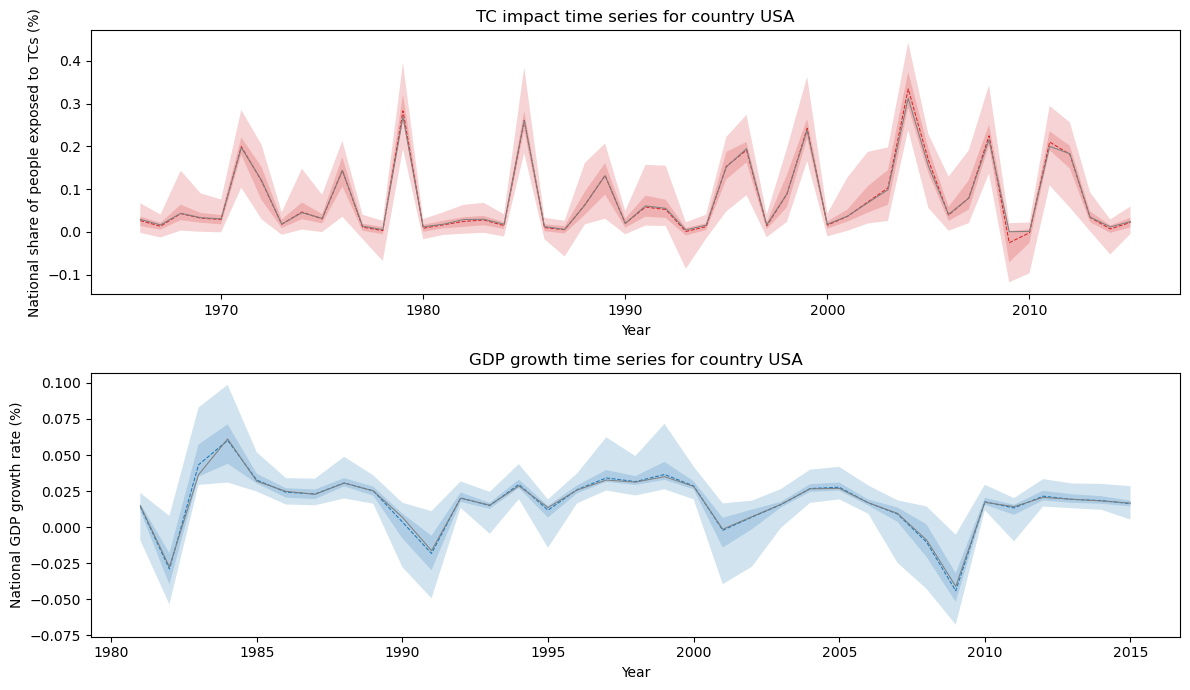

In [5]:
fig = plt.figure(figsize=(12, 7))
linestyle = "--"

ax = fig.add_subplot(211)
color = "tab:red"
x = aff_med.year
ax.plot(x, aff_med, c=color, linestyle=linestyle, linewidth=0.75)
ax.fill_between(x, aff_q17, aff_q83, facecolor=color, alpha=0.2, edgecolor="none")
ax.fill_between(x, aff_qmin, aff_qmax, facecolor=color, alpha=0.2, edgecolor="none")
ax.plot(ds_nb.year, ds_nb.affected, c="grey", linestyle="-", linewidth=0.75)
ax.set_xlabel("Year")
ax.set_ylabel("National share of people exposed to TCs (%)")
ax.set_title(f"TC impact time series for country {sel_country_name}")

ax = fig.add_subplot(212)
color = "tab:blue"
x = gdp_med.year
ax.plot(x, gdp_med, c=color, linestyle=linestyle, linewidth=0.75)
ax.fill_between(x, gdp_q17, gdp_q83, facecolor=color, alpha=0.2, edgecolor="none")
ax.fill_between(x, gdp_qmin, gdp_qmax, facecolor=color, alpha=0.2, edgecolor="none")
ax.plot(ds_nb.year, ds_nb.gdppc_ch, c="grey", linestyle="-", linewidth=0.75)
ax.set_xlabel("Year")
ax.set_ylabel("National GDP growth rate (%)")
ax.set_title(f"GDP growth time series for country {sel_country_name}")

fig.tight_layout()